In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('movies.csv')

# Data set read

In [38]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


# Checking data types

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [40]:
split_columns = df['released'].str.split('(', n=1, expand=True)
df['released_date'] = split_columns[0].str.strip()
df['released_location'] = split_columns[1].str.strip(' )')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_location
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,"October 23, 2020",United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,"February 7, 2020",United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,"April 27, 2020",Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,"October 1, 2020",United States


In [41]:
df['released_date'] = pd.to_datetime(df['released_date'], errors='coerce')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_location
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020-10-23,United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020-02-07,United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020-04-27,Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020-10-01,United States


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               7668 non-null   object        
 1   rating             7591 non-null   object        
 2   genre              7668 non-null   object        
 3   year               7668 non-null   int64         
 4   released           7666 non-null   object        
 5   score              7665 non-null   float64       
 6   votes              7665 non-null   float64       
 7   director           7668 non-null   object        
 8   writer             7665 non-null   object        
 9   star               7667 non-null   object        
 10  country            7665 non-null   object        
 11  budget             5497 non-null   float64       
 12  gross              7479 non-null   float64       
 13  company            7651 non-null   object        
 14  runtime 

# Checking for duplicate values

In [43]:
duplicate_values=df.duplicated().sum()
duplicate_values

np.int64(0)

# no duplicate values found

# checking for null values

In [44]:
null_values=df.isnull().sum()

In [45]:
null_values

name                    0
rating                 77
genre                   0
year                    0
released                2
score                   3
votes                   3
director                0
writer                  3
star                    1
country                 3
budget               2171
gross                 189
company                17
runtime                 4
released_date          59
released_location       2
dtype: int64

# Filling null values with the mean of column

In [46]:
df['budget'] = df['budget'].fillna(df['budget'].mean())
df['gross'] = df['gross'].fillna(df['gross'].mean())
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())

In [47]:
null_values=df.isnull().sum()
null_values

name                  0
rating               77
genre                 0
year                  0
released              2
score                 3
votes                 3
director              0
writer                3
star                  1
country               3
budget                0
gross                 0
company              17
runtime               0
released_date        59
released_location     2
dtype: int64

# deleting some null values

In [48]:
df = df.dropna()

In [49]:
null_values=df.isnull().sum()
null_values

name                 0
rating               0
genre                0
year                 0
released             0
score                0
votes                0
director             0
writer               0
star                 0
country              0
budget               0
gross                0
company              0
runtime              0
released_date        0
released_location    0
dtype: int64

# Counting total number of movies of each genre.

In [50]:
genre_counts = df['genre'].value_counts()
genre_counts

genre
Comedy       2213
Action       1693
Drama        1457
Crime         538
Biography     436
Adventure     425
Animation     334
Horror        316
Fantasy        42
Mystery        19
Thriller       14
Family         10
Sci-Fi          9
Romance         8
Western         3
Music           1
Sport           1
Musical         1
Name: count, dtype: int64

# counting all unique values in rating and finding the total count

In [51]:
unique_values = df['rating'].unique()
rating_count = df['rating'].value_counts()
unique_value_count=pd.DataFrame(rating_count,index=unique_values)
unique_value_count

,count
R,3657
PG,1243
G,152
Not Rated,276
NC-17,23
Approved,1
PG-13,2103
Unrated,49
X,3
TV-PG,3


# How many movie each company has made

In [52]:
company_count = df['company'].value_counts()
company_count

company
Universal Pictures             377
Warner Bros.                   333
Columbia Pictures              332
Paramount Pictures             320
Twentieth Century Fox          239
                              ... 
Continental Motion Pictures      1
Guardian Trust Company           1
Cattle Annie Productions         1
Les Films 13                     1
Two Flints                       1
Name: count, Length: 2314, dtype: int64

# Movie production by each  country

In [53]:
country_count = df['country'].value_counts()
country_count

country
United States                     5425
United Kingdom                     797
France                             256
Canada                             185
Germany                            114
Australia                           90
Japan                               74
India                               61
Italy                               57
Spain                               47
Hong Kong                           43
Ireland                             41
China                               34
Denmark                             31
South Korea                         31
New Zealand                         25
Sweden                              24
Mexico                              20
Norway                              12
Netherlands                         11
Switzerland                         10
Iran                                 9
Russia                               8
Belgium                              8
Czech Republic                       8
West Germany     

# No. of movies done by the actors.

In [54]:
star_count = df['star'].value_counts()
star_count

star
Nicolas Cage         43
Tom Hanks            41
Robert De Niro       41
Denzel Washington    37
Bruce Willis         34
                     ..
Valerie Pachner       1
Louis Koo             1
Vidyut Jammwal        1
David McConnell       1
Spencer Brown         1
Name: count, Length: 2725, dtype: int64

# Movies produced by united states on each genre.

In [55]:
usa = df[df['country'] == 'United States']

In [56]:
genre_usa = usa['genre'].value_counts()
print(genre_usa)

genre
Comedy       1788
Action       1292
Drama         886
Crime         378
Adventure     277
Biography     249
Horror        244
Animation     237
Fantasy        33
Mystery        14
Thriller        8
Family          8
Sci-Fi          6
Romance         3
Western         1
Sport           1
Name: count, dtype: int64


# Graph for number of movies by genre in usa

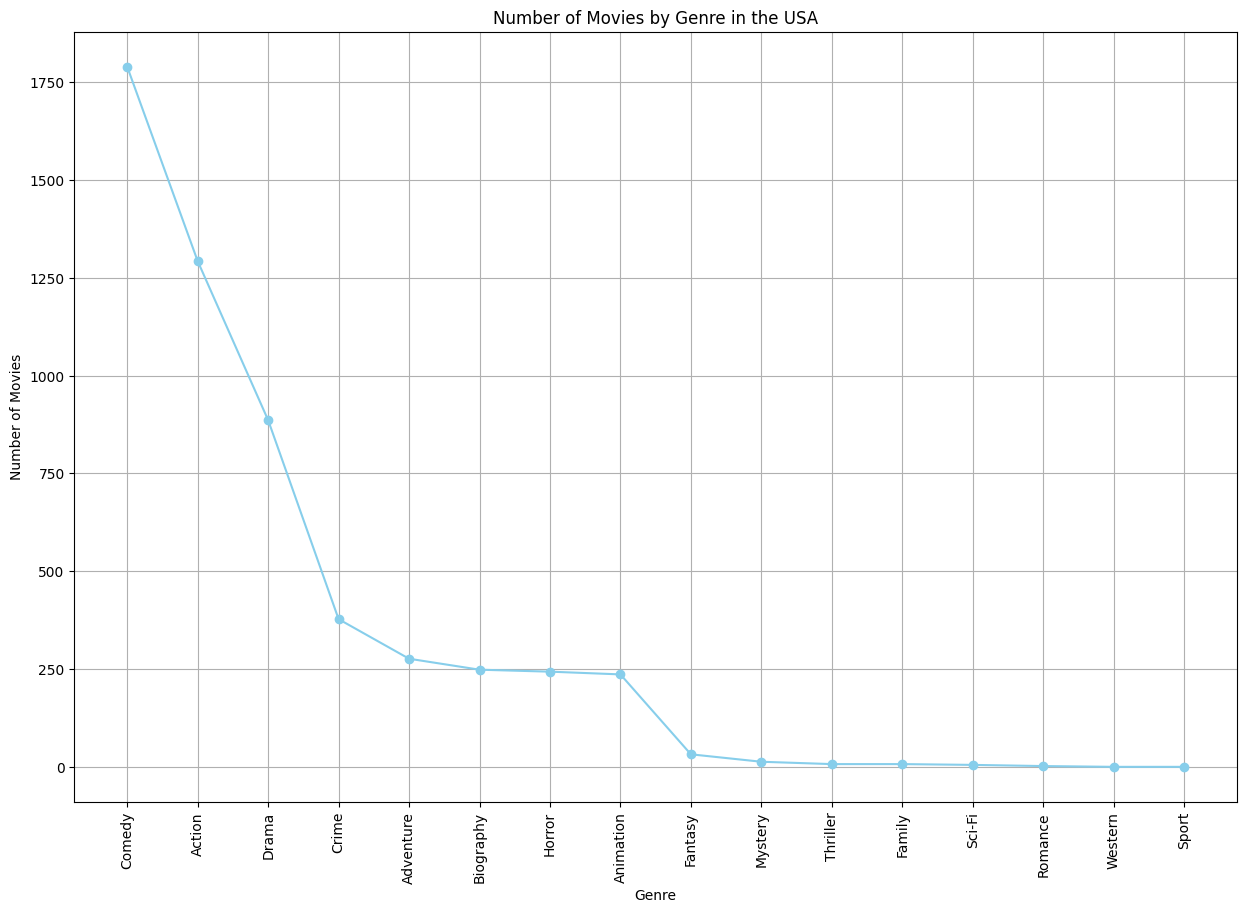

In [59]:
genre_usa_df = genre_usa.reset_index()
genre_usa_df.columns = ['genre', 'count']
plt.figure(figsize=(15, 10))
plt.plot(genre_usa_df['genre'], genre_usa_df['count'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre in the USA')
plt.xticks(rotation=90)
plt.grid(True)  
plt.show()

In [5]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Total production cost on each genre.

In [60]:
budget_genre = df.groupby('genre')['budget'].sum()
budget_genre

genre
Action       9.245819e+10
Adventure    1.845469e+10
Animation    2.313610e+10
Biography    1.235046e+10
Comedy       5.928967e+10
Crime        1.391206e+10
Drama        4.110508e+10
Family       4.180393e+08
Fantasy      7.753798e+08
Horror       5.370875e+09
Music        3.558988e+07
Musical      3.558988e+07
Mystery      6.417696e+08
Romance      2.269696e+08
Sci-Fi       2.286798e+08
Sport        3.558988e+07
Thriller     2.941393e+08
Western      5.658988e+07
Name: budget, dtype: float64

# No. of movies made per year

In [61]:
movie_per_year = df.groupby('year').size()
movie_per_year_df = movie_per_year.reset_index(name='number_of_movies')
movie_per_year_df

,year,number_of_movies
0,1980,90
1,1981,111
2,1982,123
3,1983,135
4,1984,165
5,1985,194
6,1986,193
7,1987,195
8,1988,192
9,1989,191


# People votes on each genre

In [62]:
genre_per_votes = df.groupby('genre')['votes'].sum()
genre_per_votes

genre
Action       239401220.0
Adventure     43115042.0
Animation     42888158.0
Biography     40028548.0
Comedy       121724139.0
Crime         49872580.0
Drama        104986566.0
Family          753400.0
Fantasy        2530900.0
Horror        21847015.0
Music            12000.0
Musical            321.0
Mystery        4601015.0
Romance         356774.0
Sci-Fi          884765.0
Sport              691.0
Thriller        316282.0
Western           6199.0
Name: votes, dtype: float64

# Mean value of the genre.

In [63]:
genre_mean_score = df.groupby('genre')['score'].mean()
genre_mean_score

genre
Action       6.205434
Adventure    6.283765
Animation    6.758683
Biography    7.040826
Comedy       6.190872
Crime        6.676394
Drama        6.692931
Family       6.540000
Fantasy      6.033333
Horror       5.757278
Music        7.200000
Musical      7.900000
Mystery      6.705263
Romance      6.500000
Sci-Fi       6.266667
Sport        5.900000
Thriller     5.971429
Western      5.666667
Name: score, dtype: float64

# Describes the count,min,max,mean etc.

In [64]:
df.describe()

,year,score,votes,budget,gross,runtime,released_date
count,7520.000000,7520.000000,7.520000e+03,7.520000e+03,7.520000e+03,7520.000000,7520
mean,2000.457314,6.388697,8.953798e+04,3.574807e+07,7.946456e+07,107.320248,2001-03-04 19:24:15.319148928
min,1980.000000,1.900000,3.500000e+01,3.000000e+03,3.090000e+02,63.000000,1980-01-18 00:00:00
25%,1991.000000,5.800000,9.600000e+03,1.400000e+07,5.007671e+06,95.000000,1991-10-09 06:00:00
50%,2001.000000,6.500000,3.400000e+04,3.500000e+07,2.186241e+07,104.000000,2001-04-20 00:00:00
75%,2010.000000,7.100000,9.500000e+04,3.558988e+07,7.850054e+07,116.000000,2010-10-15 00:00:00
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,2020-12-25 00:00:00
std,11.097737,0.968125,1.644756e+05,3.536722e+07,1.649035e+08,18.619730,NaN


In [65]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_location
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25,United States


# Average runtime for movie

In [67]:
average_runtime = df['runtime'].mean()
average_runtime

np.float64(107.32024755488496)

In [ ]:
# No. of movies made in 1980 in each month. 

In [68]:
released_movie_in_1980 = df[df['released_date'].dt.year==1980]
monthly_counts = released_movie_in_1980.groupby(released_movie_in_1980['released_date'].dt.month).size()
count=monthly_counts.reset_index(name='No. of movies')
count

,released_date,No. of movies
0,1,2
1,2,6
2,3,7
3,4,1
4,5,7
5,6,13
6,7,9
7,8,9
8,9,7
9,10,6
